In [1]:
import numpy as np
import math
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import *
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import *

In [2]:
df = pd.read_csv("/home/shubhamsingh/Desktop/stock/data1.csv", parse_dates = {'dateTime': ['date']}, index_col = 'dateTime')

In [4]:
df.head()

,close,open,high,low,sensex,nifty,usd,hangseng
dateTime,,,,,,,,
2019-12-02,750.400024,763.000000,763.000000,741.000000,36405.71875,10879.70020,70.535,28171.33
2019-11-02,761.599976,760.000000,768.650024,757.549988,36585.50000,10930.90039,71.140,28143.84
2019-08-02,759.849976,764.000000,771.150024,755.099976,36873.58984,11023.50000,71.160,27946.32
2019-07-02,763.349976,761.099976,769.500000,760.650024,37026.55859,11070.45020,71.175,27990.21
2019-06-02,762.650024,754.250000,766.150024,753.799988,36714.53906,10965.09961,71.300,27930.74


In [5]:
df.sort_index(axis=0, inplace=True)

In [6]:
X = df[['open', 'high', 'low', 'sensex', 'nifty', 'usd', 'hangseng']]
y = df[['close']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
scalerX = StandardScaler().fit(X_train)

In [9]:
scalery = StandardScaler().fit(y_train)

In [10]:
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)

In [11]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
testPredicted = reg.predict(X_test)
testScore = math.sqrt(mean_squared_error(scalery.inverse_transform(y_test), scalery.inverse_transform(testPredicted)))
print('Test Score: %.2f RMSE' % (testScore))
reg.score(X_test, y_test)

Test Score: 2.35 RMSE


0.999519172782721

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
cross_val_score(reg, X_test, y_test, cv = 10)

array([0.99947124, 0.99940973, 0.99938457, 0.99925782, 0.99948387,
       0.99935749, 0.99975565, 0.99967633, 0.9996862 , 0.99932874])

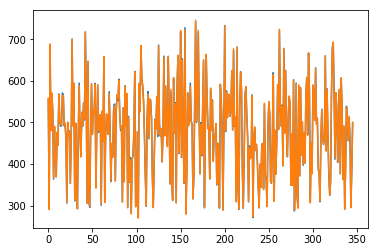

In [14]:
plt.plot(scalery.inverse_transform(y_test))
plt.plot(scalery.inverse_transform(testPredicted))
plt.show()